# Explore our dataset

First of all import our stuffs

In [2]:
# Name me a better trio than this, i'll wait

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Inline approach, just for convenience

%matplotlib inline

import seaborn as sns
import datetime

# from scipy.stats import gaussian_kde

from scipy import interpolate
from scipy import ndimage

# memory usage checker

import ipython_memory_usage.ipython_memory_usage as imu
imu.start_watching_memory()


In [2] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 124.35 MiB


In [3]:
# Set style for our visualization
sns.set_style("darkgrid")

In [3] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 124.35 MiB


## Import our data

In [4]:
data = pd.read_csv("../data/final_no_2015_2016.csv")

In [4] used 2530.0781 MiB RAM in 16.90s, peaked 760.22 MiB above current, total RAM usage 2654.43 MiB


In [4]:
# legenda for our data

legenda = {"PURPOSE_CD":"OFF = offerta di vendita. BID = offerta d'acquisto",
"INTERVAL_NO":"ora del giorno",
"BID_OFFER_DATE_DT":"data",
"QUANTITY_NO":"quantità offerta o domandata",
"AWARDED_QUANTITY_NO":"quantità assegnata dopo l'asta",
"ENERGY_PRICE_NO":"prezzo offerto o richiesto (negli acquisti, PURPOSE_CD = BID, il valore di 0 significa che sono disposti ad acquistare a qualunque prezzo.",
"MERIT_ORDER_NO":"Ordinamento dal più conveniente al più costoso per l'offerta di vendita",
"PARTIAL_QTY_ACCEPTED_IN":"Nell'impianto marginale (quello che fa incrociare offerta e domanda) potrebbe essere necessaria solo una parte della quantità offerta e non tutta, quando ciò avviene lo trovate qui",
"ZONE_CD":"zona (l'Italia è divisa in 6 zone e poi vi sono le zone d'importazione)",
"AWARDED_PRICE_NO":"prezzo attribuito (potrebbe differire nelle varie zone se le linee di connessione sono sature)",
"OPERATORE":"nome dell'operatore"}

In [4] used 1.3281 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 9274.57 MiB


In [5]:
legenda['PURPOSE_CD'] # example

"OFF = offerta di vendita. BID = offerta d'acquisto"

In [5] used 2.9375 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 9277.51 MiB


In [6]:
data.drop("Unnamed: 0", axis = 1, inplace = True) # remove useless column

KeyError: "['Unnamed: 0'] not found in axis"

In [6] used 4.8945 MiB RAM in 0.35s, peaked 0.00 MiB above current, total RAM usage 9282.40 MiB


Now some exploration

In [7]:
data.head()

PURPOSE_CD  INTERVAL_NO  BID_OFFER_DATE_DT  QUANTITY_NO  \
0        BID            1           20150515       12.611   
1        BID            2           20150515       12.528   
2        BID            3           20150515       12.447   
3        BID            4           20150515       12.463   
4        BID            5           20150515        2.325   

   AWARDED_QUANTITY_NO  ENERGY_PRICE_NO  MERIT_ORDER_NO  \
0               12.611              0.0           538.0   
1               12.528              0.0           538.0   
2               12.447              0.0           541.0   
3               12.463              0.0           539.0   
4                2.325              0.0           541.0   

  PARTIAL_QTY_ACCEPTED_IN ZONE_CD  AWARDED_PRICE_NO      OPERATORE  
0                       N    CNOR             43.73  Bilateralista  
1                       N    CNOR             40.00  Bilateralista  
2                       N    CNOR             32.70  Bilateralista  
3                       N    CNOR             34.68  Bilateralista  
4                       N    CNOR             34.61  Bilateralista

In [7] used 1.1836 MiB RAM in 0.14s, peaked 0.00 MiB above current, total RAM usage 9283.59 MiB


In [8]:
data.info(memory_usage = True, null_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54623108 entries, 0 to 54623107
Data columns (total 11 columns):
PURPOSE_CD                 54623108 non-null object
INTERVAL_NO                54623108 non-null int64
BID_OFFER_DATE_DT          54623108 non-null int64
QUANTITY_NO                54623108 non-null float64
AWARDED_QUANTITY_NO        54623108 non-null float64
ENERGY_PRICE_NO            54623107 non-null float64
MERIT_ORDER_NO             54623107 non-null float64
PARTIAL_QTY_ACCEPTED_IN    54623107 non-null object
ZONE_CD                    54623107 non-null object
AWARDED_PRICE_NO           54623107 non-null float64
OPERATORE                  54623107 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ GB
In [8] used 1.1055 MiB RAM in 11.55s, peaked 1145.93 MiB above current, total RAM usage 9284.69 MiB


In [9]:
data.describe() # describe numeric variable

INTERVAL_NO  BID_OFFER_DATE_DT   QUANTITY_NO  AWARDED_QUANTITY_NO  \
count  5.462311e+07       5.462311e+07  5.462311e+07         5.462311e+07   
mean   1.269338e+01       2.016572e+07  3.371866e+01         3.354015e+01   
std    6.779105e+00       1.000333e+04  1.253423e+02         1.246800e+02   
min    1.000000e+00       2.015011e+07  1.000000e-03         1.000000e-03   
25%    7.000000e+00       2.016031e+07  8.300000e-01         8.290000e-01   
50%    1.300000e+01       2.017011e+07  5.000000e+00         5.000000e+00   
75%    1.800000e+01       2.017103e+07  1.866200e+01         1.860000e+01   
max    2.500000e+01       2.018092e+07  1.500000e+04         5.482392e+03   

       ENERGY_PRICE_NO  MERIT_ORDER_NO  AWARDED_PRICE_NO  
count     5.462311e+07    5.462311e+07      5.462311e+07  
mean      2.000449e+01    5.061583e+02      5.143027e+01  
std       1.082169e+02    3.256190e+02      1.653868e+01  
min       0.000000e+00    0.000000e+00      0.000000e+00  
25%       0.000000e+00    2.380000e+02      4.059000e+01  
50%       0.000000e+00    4.760000e+02      4.924000e+01  
75%       9.970000e+00    7.170000e+02      5.915000e+01  
max       3.000000e+03    1.713000e+03      4.000000e+02

In [9] used 2.5820 MiB RAM in 12.24s, peaked 2915.98 MiB above current, total RAM usage 9287.27 MiB


In [5]:
# Parse our date column into datetime object

data['BID_OFFER_DATE_DT'] = pd.to_datetime(data['BID_OFFER_DATE_DT'], format = "%Y%m%d", exact = True)

In [5] used -314.6289 MiB RAM in 5.10s, peaked 2238.00 MiB above current, total RAM usage 2339.80 MiB


In [12]:
data.info(memory_usage = True, null_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13781335 entries, 0 to 13781334
Data columns (total 11 columns):
PURPOSE_CD                 13781335 non-null object
INTERVAL_NO                13781335 non-null int64
BID_OFFER_DATE_DT          13781335 non-null datetime64[ns]
QUANTITY_NO                13781335 non-null float64
AWARDED_QUANTITY_NO        13781335 non-null float64
ENERGY_PRICE_NO            13781334 non-null float64
MERIT_ORDER_NO             13781334 non-null float64
PARTIAL_QTY_ACCEPTED_IN    13781334 non-null object
ZONE_CD                    13781334 non-null object
AWARDED_PRICE_NO           13781334 non-null float64
OPERATORE                  13781334 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.1+ GB


In [13]:
legenda['INTERVAL_NO']

'ora del giorno'

We should concat INTERVAL_NO and BID_OFFER_DATE_DT but INTERVAL_NO has a strange format. We need to understand this column in order to incorporate it with BID_OFFER_DATE_DT in *datetime format*.

<p><font size = 5>Due to hours change during the year some days have 23 or 25 INTERVALS.</font><p>

In [14]:
intervals = np.sort(data['INTERVAL_NO'].unique())

In [15]:
intervals # 25 intervals ?! --> fixed

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

## Missing values

In [16]:
# plt.figure(figsize = (10,6))
# sns.heatmap(data.isna(), cbar = False)

In [6]:
data.isna().any()

Unnamed: 0                 False
PURPOSE_CD                 False
INTERVAL_NO                False
BID_OFFER_DATE_DT          False
QUANTITY_NO                False
AWARDED_QUANTITY_NO        False
ENERGY_PRICE_NO             True
MERIT_ORDER_NO              True
PARTIAL_QTY_ACCEPTED_IN     True
ZONE_CD                     True
AWARDED_PRICE_NO            True
OPERATORE                   True
dtype: bool

In [6] used 0.0039 MiB RAM in 2.91s, peaked 315.30 MiB above current, total RAM usage 2339.80 MiB


In [7]:
data[data['AWARDED_PRICE_NO'].isna()]

Unnamed: 0 PURPOSE_CD  INTERVAL_NO BID_OFFER_DATE_DT  QUANTITY_NO  \
3714892    14714892        BID           16        2018-04-12      351.519   

         AWARDED_QUANTITY_NO  ENERGY_PRICE_NO  MERIT_ORDER_NO  \
3714892              351.519              NaN             NaN   

        PARTIAL_QTY_ACCEPTED_IN ZONE_CD  AWARDED_PRICE_NO OPERATORE  
3714892                     NaN     NaN               NaN       NaN

In [7] used 0.0000 MiB RAM in 0.14s, peaked 0.00 MiB above current, total RAM usage 2339.80 MiB


line number 3714892

I dont know why but only 12/04/2018 contains missing values, dropping this line data.isna().any() return everything False.

In [8]:
data.drop([3714892], axis = 0, inplace = True)

In [8] used 722.5938 MiB RAM in 2.13s, peaked 946.22 MiB above current, total RAM usage 3062.40 MiB


In [9]:
data.isna().any()

Unnamed: 0                 False
PURPOSE_CD                 False
INTERVAL_NO                False
BID_OFFER_DATE_DT          False
QUANTITY_NO                False
AWARDED_QUANTITY_NO        False
ENERGY_PRICE_NO            False
MERIT_ORDER_NO             False
PARTIAL_QTY_ACCEPTED_IN    False
ZONE_CD                    False
AWARDED_PRICE_NO           False
OPERATORE                  False
dtype: bool

In [9] used 0.0000 MiB RAM in 2.98s, peaked 315.30 MiB above current, total RAM usage 3062.40 MiB


## Fixing INTERVAL_NO

In [8]:
data.BID_OFFER_DATE_DT.dt.year.unique()

array([2017, 2018])

We have 2017 and 2018

FIX days with 25 intervals

In [22]:
len(data[data.BID_OFFER_DATE_DT.dt.year==2018]), len(data)

(4848729, 13781334)

In [10]:
np.sort(data[(data.BID_OFFER_DATE_DT.dt.month==1)&(data.BID_OFFER_DATE_DT.dt.year==2017)].BID_OFFER_DATE_DT.unique())

array(['2017-01-03T00:00:00.000000000', '2017-01-05T00:00:00.000000000',
       '2017-01-08T00:00:00.000000000', '2017-01-11T00:00:00.000000000',
       '2017-01-14T00:00:00.000000000', '2017-01-16T00:00:00.000000000',
       '2017-01-18T00:00:00.000000000', '2017-01-19T00:00:00.000000000',
       '2017-01-20T00:00:00.000000000', '2017-01-23T00:00:00.000000000',
       '2017-01-24T00:00:00.000000000', '2017-01-26T00:00:00.000000000',
       '2017-01-28T00:00:00.000000000', '2017-01-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [10] used 0.0000 MiB RAM in 0.79s, peaked 0.00 MiB above current, total RAM usage 3062.40 MiB


In [1]:
len(data[(data.BID_OFFER_DATE_DT.dt.month==3)&(data.BID_OFFER_DATE_DT.dt.year==2018)].BID_OFFER_DATE_DT.unique())

NameError: name 'data' is not defined

In [33]:
years=[2017,2018]
months=list(range(1,13))

for year in years:
    for month in months:
        print(len(data[(data.BID_OFFER_DATE_DT.dt.month==month)&(data.BID_OFFER_DATE_DT.dt.year==year)].BID_OFFER_DATE_DT.unique()),"\tdays in \t", month, "\t-", year)

14 	days in 	 1 	- 2017
21 	days in 	 2 	- 2017
7 	days in 	 3 	- 2017
6 	days in 	 4 	- 2017
17 	days in 	 5 	- 2017
28 	days in 	 6 	- 2017
17 	days in 	 7 	- 2017
8 	days in 	 8 	- 2017
15 	days in 	 9 	- 2017
23 	days in 	 10 	- 2017
22 	days in 	 11 	- 2017
21 	days in 	 12 	- 2017
4 	days in 	 1 	- 2018
8 	days in 	 2 	- 2018
22 	days in 	 3 	- 2018
18 	days in 	 4 	- 2018
11 	days in 	 5 	- 2018
8 	days in 	 6 	- 2018
11 	days in 	 7 	- 2018
19 	days in 	 8 	- 2018
4 	days in 	 9 	- 2018
0 	days in 	 10 	- 2018
0 	days in 	 11 	- 2018
0 	days in 	 12 	- 2018


Days are less than expected

In [25]:
for date in data.BID_OFFER_DATE_DT.unique():
    if 25 in data[data.BID_OFFER_DATE_DT==date]["INTERVAL_NO"].unique():
        print("extra 25 in ",date)

extra 25 in  2017-10-29T00:00:00.000000000


Only 29-10-2017 has 25 intervals

In [26]:
data=data[data["INTERVAL_NO"]!=25]

FIX days with 23 hours

In [32]:
got=False
for date in data.BID_OFFER_DATE_DT.unique():
    if 24 not in data[data.BID_OFFER_DATE_DT==date]["INTERVAL_NO"].unique():
        print("missing 24 in ",date)
        got=True
if not got: print("no missing 24-th interval")

no missing 24-th interval


## Mapping INTERVAL_NO to datetime

In [34]:
def rep(row):
    interv=row.INTERVAL_NO
    
    return row.BID_OFFER_DATE_DT.replace(hour=interv-1)

Remember che l'intervallo scala di uno

In [46]:
for row in data.itertuples():
    data.set_value(row.Index, "date",row.BID_OFFER_DATE_DT.replace(hour=row.INTERVAL_NO-1))

/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [48]:
data[["date","BID_OFFER_DATE_DT", "INTERVAL_NO"]].head()

date BID_OFFER_DATE_DT  INTERVAL_NO
0  2017-01-28 13:00:00        2017-01-28           14
1  2017-01-28 14:00:00        2017-01-28           15
2  2017-01-28 14:00:00        2017-01-28           15
3  2017-01-28 15:00:00        2017-01-28           16
4  2017-01-28 15:00:00        2017-01-28           16

In [49]:
data.drop("BID_OFFER_DATE_DT", axis=1, inplace=True)

In [ ]:
data.drop("INTERVAL_NO", axis=1, inplace=True)

In [67]:
data.columns[len(data.columns)-1]

'date'

In [65]:
data.head()

PURPOSE_CD  QUANTITY_NO  AWARDED_QUANTITY_NO  ENERGY_PRICE_NO  \
0        BID       52.517               52.517              0.0   
1        BID        8.000                8.000              0.0   
2        BID       52.707               52.707              0.0   
3        BID        8.000                8.000              0.0   
4        BID       52.960               52.960              0.0   

   MERIT_ORDER_NO PARTIAL_QTY_ACCEPTED_IN ZONE_CD  AWARDED_PRICE_NO  \
0           281.0                       N    CSUD             56.93   
1           592.0                       N    CSUD             54.43   
2           281.0                       N    CSUD             54.43   
3           594.0                       N    CSUD             54.73   
4           284.0                       N    CSUD             54.73   

           OPERATORE                 date  
0      Bilateralista  2017-01-28 13:00:00  
1  TELENERGIA S.R.L.  2017-01-28 14:00:00  
2      Bilateralista  2017-01-28 14:00:00  
3  TELENERGIA S.R.L.  2017-01-28 15:00:00  
4      Bilateralista  2017-01-28 15:00:00

In [72]:
data.columns=[col.lower() for col in data.columns]

In [73]:
data.head()

purpose_cd  quantity_no  awarded_quantity_no  energy_price_no  \
0        BID       52.517               52.517              0.0   
1        BID        8.000                8.000              0.0   
2        BID       52.707               52.707              0.0   
3        BID        8.000                8.000              0.0   
4        BID       52.960               52.960              0.0   

   merit_order_no partial_qty_accepted_in zone_cd  awarded_price_no  \
0           281.0                       N    CSUD             56.93   
1           592.0                       N    CSUD             54.43   
2           281.0                       N    CSUD             54.43   
3           594.0                       N    CSUD             54.73   
4           284.0                       N    CSUD             54.73   

           operatore                 date  
0      Bilateralista  2017-01-28 13:00:00  
1  TELENERGIA S.R.L.  2017-01-28 14:00:00  
2      Bilateralista  2017-01-28 14:00:00  
3  TELENERGIA S.R.L.  2017-01-28 15:00:00  
4      Bilateralista  2017-01-28 15:00:00

## Write our new data after pre-processing

In [ ]:
data_off=data[data.purpose_cd=="OFF"]

data_off.to_csv("../data/final_2017_2018_OFF.csv")

del data_off

In [77]:
data_bid=data[data.purpose_cd=="BID"]

data_bid.to_csv("../data/final_2017_2018_BID.csv")

del data_bid

<hr>

## Time to viz
From here there are plots and data manipulation available in another script (deprecated materials)

Now we have to take a look to ZONE_CD

In [21]:
print("We have ", len(data['ZONE_CD'].unique()), " distinct zones:")
print("\n")
print(data['ZONE_CD'].unique())

We have  18  distinct zones:


['CSUD' 'NORD' 'SARD' 'SICI' 'SUD' 'CNOR' 'COAC' 'CORS' 'GREC' 'MALT'
 'SVIZ' 'ROSN' 'BRNN' 'FOGN' 'PRGP' 'AUST' 'FRAN' 'SLOV']


In [22]:
print("ZONE_CD:", legenda['ZONE_CD'])
print("\n")
print("PURPOSE_CD:", legenda['PURPOSE_CD'])

ZONE_CD: zona (l'Italia è divisa in 6 zone e poi vi sono le zone d'importazione)


PURPOSE_CD: OFF = offerta di vendita. BID = offerta d'acquisto


Italy has only 6 zones, the others are importation zones. **We need to discuss this point**

Focus on **ENERGY_PRICE_NO**

Text(0.5, 1.0, 'PURPOSE_CD = BID')

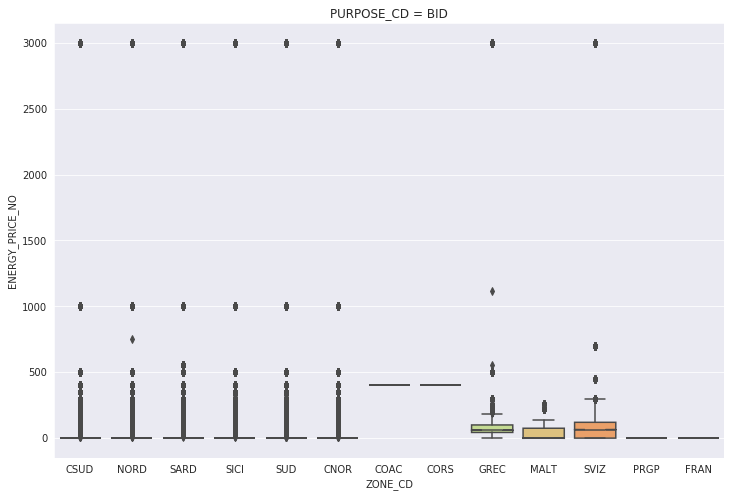

In [35]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "ZONE_CD", y = "ENERGY_PRICE_NO", data = data[data['PURPOSE_CD'] == "BID"], palette = "rainbow", notch = True)
plt.title("PURPOSE_CD = BID")

In [36]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "ZONE_CD", y = "ENERGY_PRICE_NO", data = data[data['PURPOSE_CD'] == "OFF"], palette = "rainbow", notch = True)
plt.title("PURPOSE_CD = OFF")

Text(0.5, 1.0, 'PURPOSE_CD = OFF')

Focus on **AWARDED_PRICE_NO**

Text(0.5, 1.0, 'PURPOSE_CD = BID')

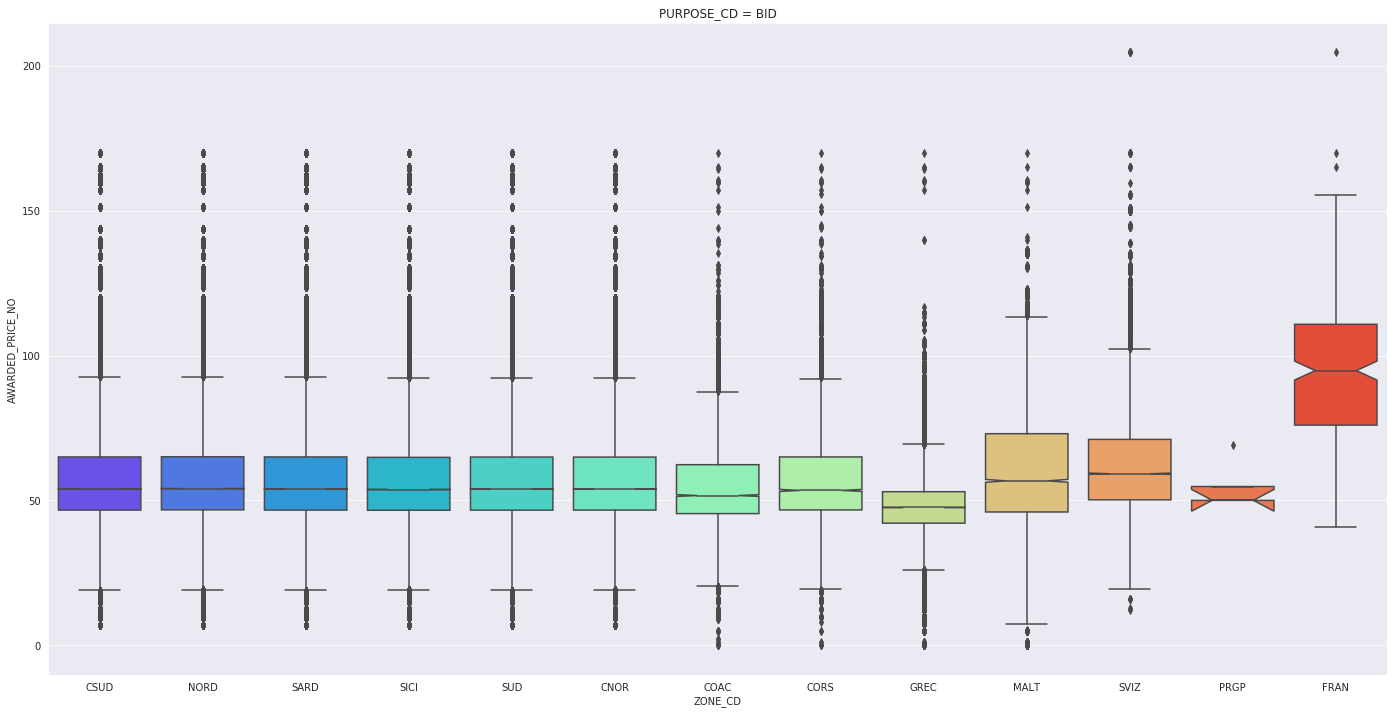

In [37]:
plt.figure(figsize = (24,12))
sns.boxplot(x = "ZONE_CD", y = "AWARDED_PRICE_NO", data = data[data['PURPOSE_CD'] == "BID"], palette = "rainbow", notch = True)
plt.title("PURPOSE_CD = BID")

Text(0.5, 1.0, 'PURPOSE_CD = BID')

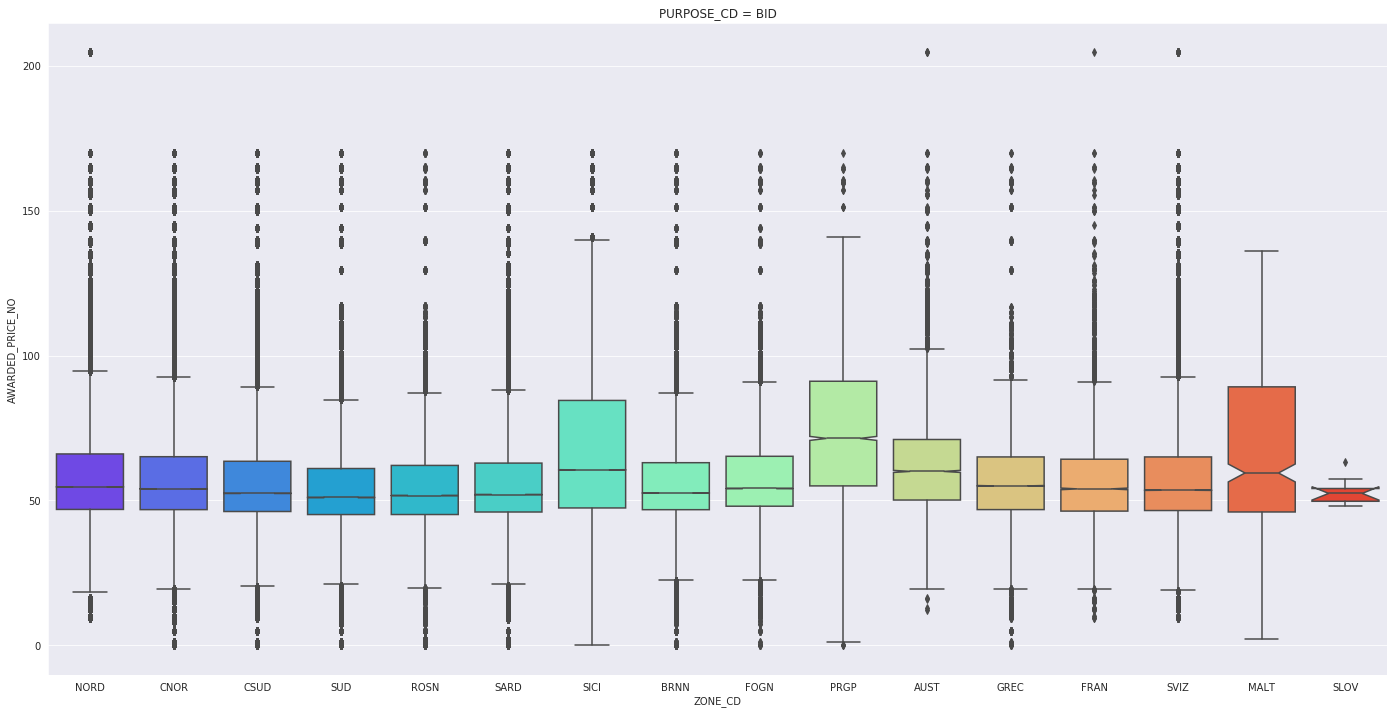

In [38]:
plt.figure(figsize = (24,12))
sns.boxplot(x = "ZONE_CD", y = "AWARDED_PRICE_NO", data = data[data['PURPOSE_CD'] == "OFF"], palette = "rainbow", notch = True)
plt.title("PURPOSE_CD = BID")

Very different distribution between PURPOSE_CD = OFF or BID

It is worth checking the relationship between ENERGY_PRICE_NO and AWARDED_PRICE_NO through time

<hr>

## Some exploration

In [69]:
df = data[data["PURPOSE_CD"]=="OFF"] # select only offer

len(df.OPERATORE.unique()) # check length

In [74]:
dd_bid = data[data["PURPOSE_CD"]=="BID"] # select only bid

len(dd_bid.OPERATORE.unique()) # check length

In [76]:
df_only_off = [off for off in df.OPERATORE if off not in dd_bid.OPERATORE ] # select only operators that make only offer

df_only_off = pd.Series(df_only_off)

len(data["OPERATORE"].unique()) # check how many they are

In [ ]:
dd = data[data["BID_OFFER_DATE_DT"]=="2017-11-04"] #random day
len(dd) # check length

In [ ]:
ddt = dd[dd["INTERVAL_NO"]==12] # random hour
len(ddt) # check length

In [62]:
ddtz = ddt[ddt["ZONE_CD"]=="NORD"] # random zone
len(ddtz) # check length

580

Compare **ENERGY_PRICE_NO** and **AWARDED_PRICE_NO** distributions

In [51]:
plt.figure(figsize = (24,12))
sns.lineplot(x = "BID_OFFER_DATE_DT", y = "ENERGY_PRICE_NO", data = data[data["PURPOSE_CD"]=="OFF"], label = "ENERGY_PRICE_NO")
sns.lineplot(x = "BID_OFFER_DATE_DT", y = "AWARDED_PRICE_NO", data = data[data["PURPOSE_CD"]=="OFF"], label = "AWARDED_PRICE_NO")
plt.title("ENERGY_PRICE_NO vs AWARDED_PRICE_NO")
plt.legend()

Compare the same variables but distinguishing between offers and bids

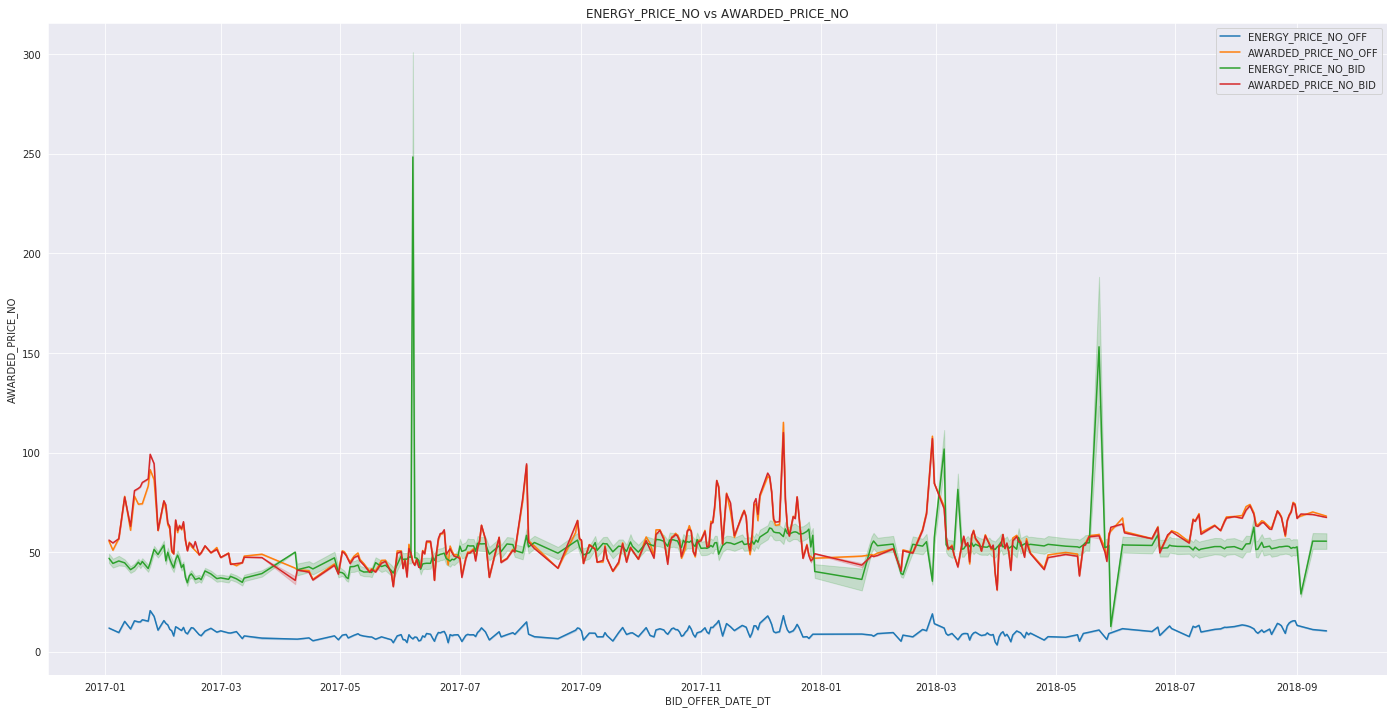

In [70]:
plt.figure(figsize = (24,12))
sns.lineplot(x = "BID_OFFER_DATE_DT", y = "ENERGY_PRICE_NO", data = df, label = "ENERGY_PRICE_NO_OFF")
sns.lineplot(x = "BID_OFFER_DATE_DT", y = "AWARDED_PRICE_NO", data = df, label = "AWARDED_PRICE_NO_OFF")
sns.lineplot(x = "BID_OFFER_DATE_DT", y = "ENERGY_PRICE_NO", data = dd_bid, label = "ENERGY_PRICE_NO_BID")
sns.lineplot(x = "BID_OFFER_DATE_DT", y = "AWARDED_PRICE_NO", data = dd_bid, label = "AWARDED_PRICE_NO_BID")
plt.title("ENERGY_PRICE_NO vs AWARDED_PRICE_NO")
plt.legend()

We need to focus also on ENERGY_PRICE_NO and AWARDED_PRICE_NO distributions

Text(0.5, 1.0, 'ENERGY_PRICE_NO distribution')

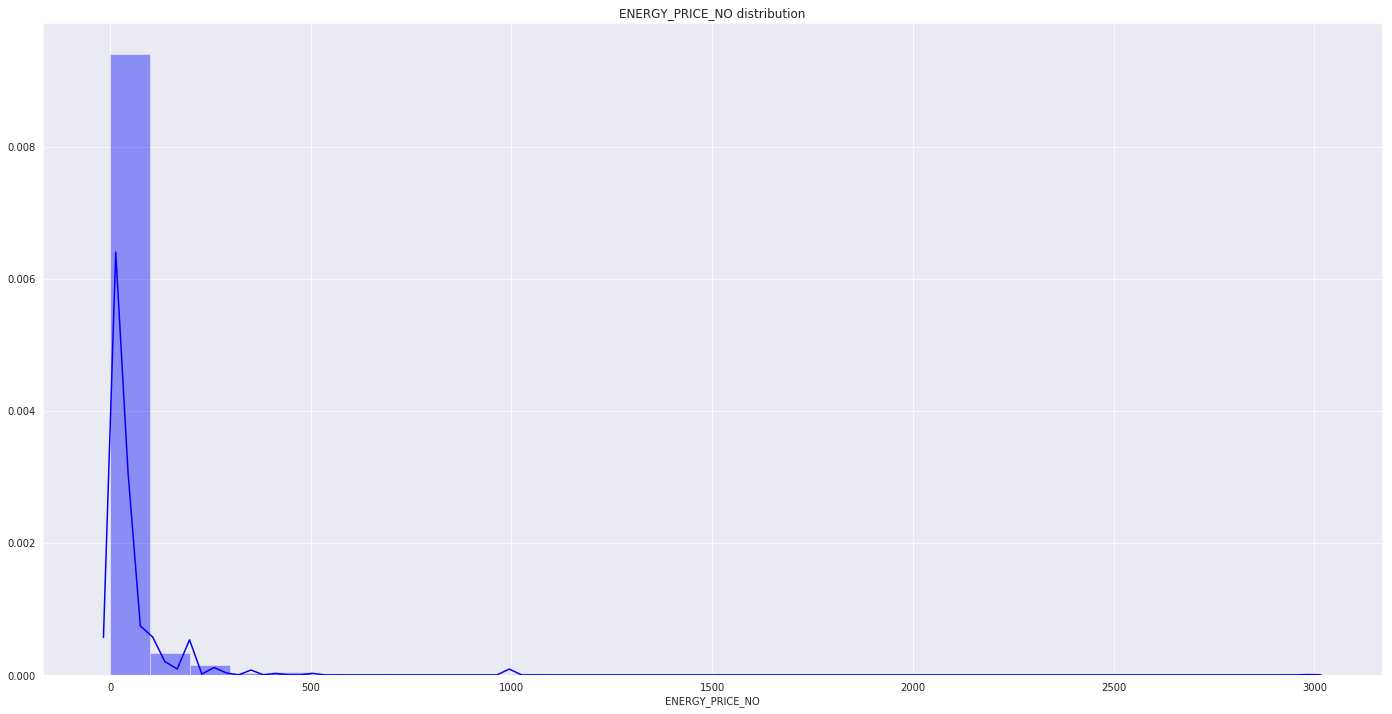

In [40]:
plt.figure(figsize = (24,12))
sns.distplot(data['ENERGY_PRICE_NO'], bins = 30, color = "blue")
plt.title("ENERGY_PRICE_NO distribution")

Text(0.5, 1.0, 'AWARDED_PRICE_NO distribution')

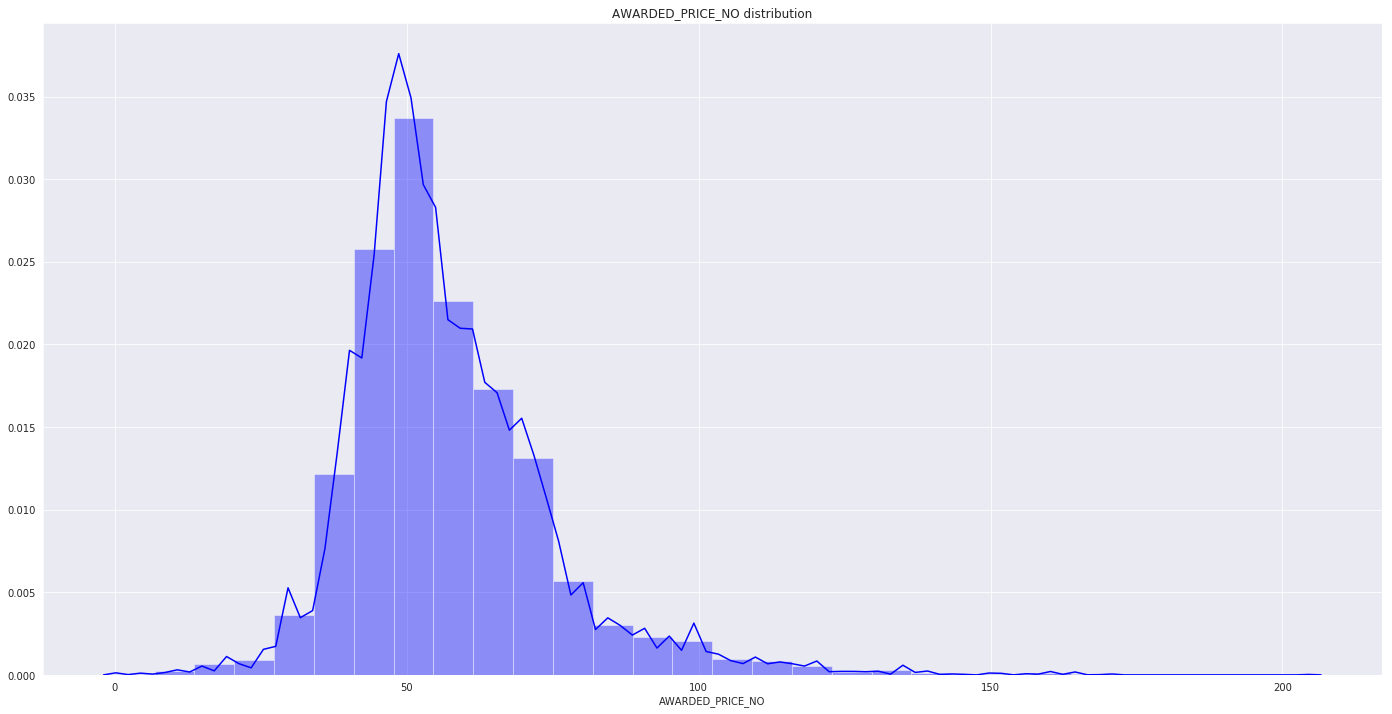

In [41]:
plt.figure(figsize = (24,12))
sns.distplot(data['AWARDED_PRICE_NO'], bins = 30, color = "blue")
plt.title("AWARDED_PRICE_NO distribution")

Also here we have strange distributions

Proviamo a riprodurre la curva in fig.1 del paper

/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

(0, 70)

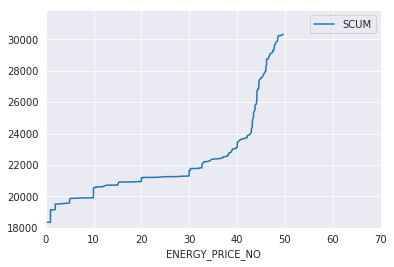

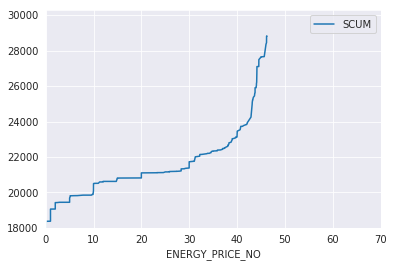

In [46]:
# take only offer in a certain day in a certain hour
carlo_df = data[(data["PURPOSE_CD"]=="OFF")& /
                (data["BID_OFFER_DATE_DT"]=="2017-11-04T00:00:00.000000000")& /
                (data["INTERVAL_NO"]==12)]

# sort price
carlo_df.sort_values(by="ENERGY_PRICE_NO", inplace=True)

# make the cumulative sum of the quantity
carlo_df["SCUM"]=np.cumsum(carlo_df["QUANTITY_NO"])

# plot
plt.figure(figsize = (10,6))
carlo_df.plot(kind="line", x="ENERGY_PRICE_NO", y="SCUM", ylim=18000).set_xlim(0,70)

# repeat
carlo_df=data[(data["PURPOSE_CD"]=="OFF")& /
              (data["BID_OFFER_DATE_DT"]=="2017-11-04T00:00:00.000000000")& /
              (data["INTERVAL_NO"]==13)]

carlo_df.sort_values(by="ENERGY_PRICE_NO", inplace=True)

carlo_df["SCUM"]=np.cumsum(carlo_df["QUANTITY_NO"])

plt.figure(figsize = (10,6))
carlo_df.plot(kind="line", x="ENERGY_PRICE_NO", y="SCUM", ylim=18000).set_xlim(0,70)


In [34]:
x = carlo_df["ENERGY_PRICE_NO"]
y = carlo_df["SCUM"]
# convert both to arrays
x_sm = np.array(x) # energy
y_sm = np.array(y) # cumsum

prices = np.sort(data.ENERGY_PRICE_NO.unique())

good_prices = prices[:int(len(prices)/2)]

data[data["ENERGY_PRICE_NO"].isin(good_prices)]

No handles with labels found to put in legend.


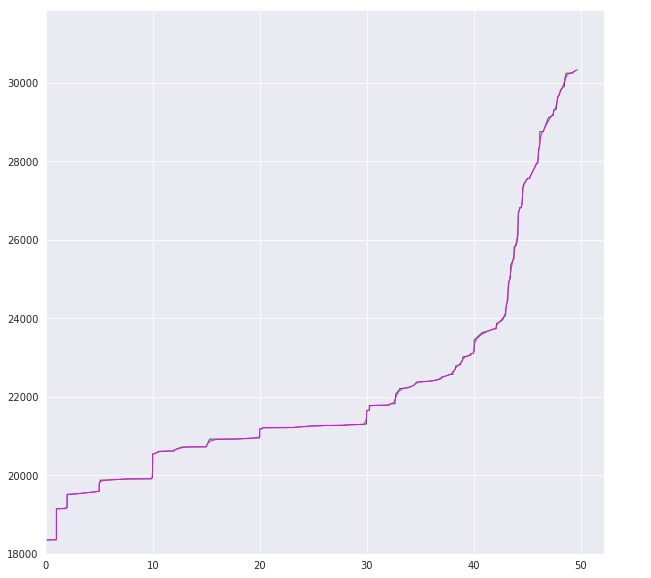

In [37]:
# kernel approximation
sigma = 1
x_g1d = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d = ndimage.gaussian_filter1d(y_sm, sigma)

fig, ax = plt.subplots(figsize=(10, 10))
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

#plt.plot(x_sm, y_sm, 'green', linewidth=1)
#plt.plot(x_smooth, y_spline, 'red', linewidth=1)
plt.plot(x, y, 'green', linewidth=1)
plt.plot(x_g1d,y_g1d, 'magenta', linewidth=1)
plt.xlim(0)
plt.ylim(18000)
plt.show()

Provo a riprodurre la fig2 dell'articolo per un solo giorno.

In [47]:
dday = data[(data["PURPOSE_CD"]=="OFF")&(data["BID_OFFER_DATE_DT"]=="2017-11-04T00:00:00.000000000")]

dday.INTERVAL_NO.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

No handles with labels found to put in legend.
/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


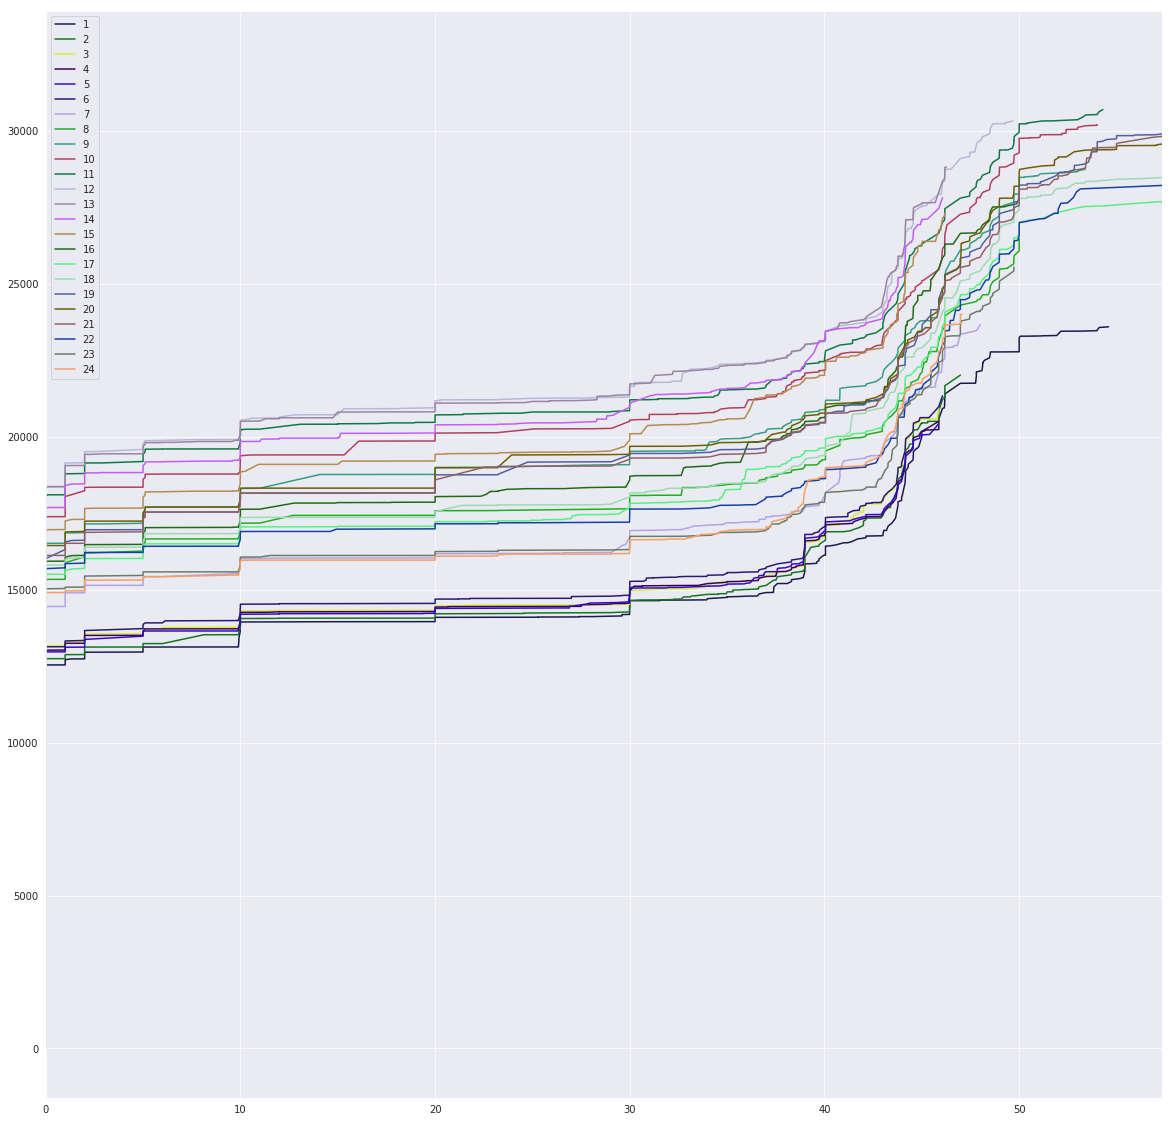

In [65]:
# initialize 3 lists in order to make our axis
x_list=[]
y_list=[]
z_list=[]

fig, ax = plt.subplots(figsize=(20, 20))

ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

for interval in dday["INTERVAL_NO"].unique():
    d = dday[dday["INTERVAL_NO"]==interval]
    d.sort_values(by = "ENERGY_PRICE_NO", inplace=True)
    d["SCUM"] = np.cumsum(d["QUANTITY_NO"])
    x = d["ENERGY_PRICE_NO"]
    x_list.append(x)
    y = d["SCUM"]
    y_list.append(y)
    z = pd.Series([interval for elem in range(len(x)) ])
    z_list.append(z)    
        
    plt.plot(x, y, c = np.random.rand(3,), label=interval)
    plt.xlim(0)

plt.legend()
plt.show()

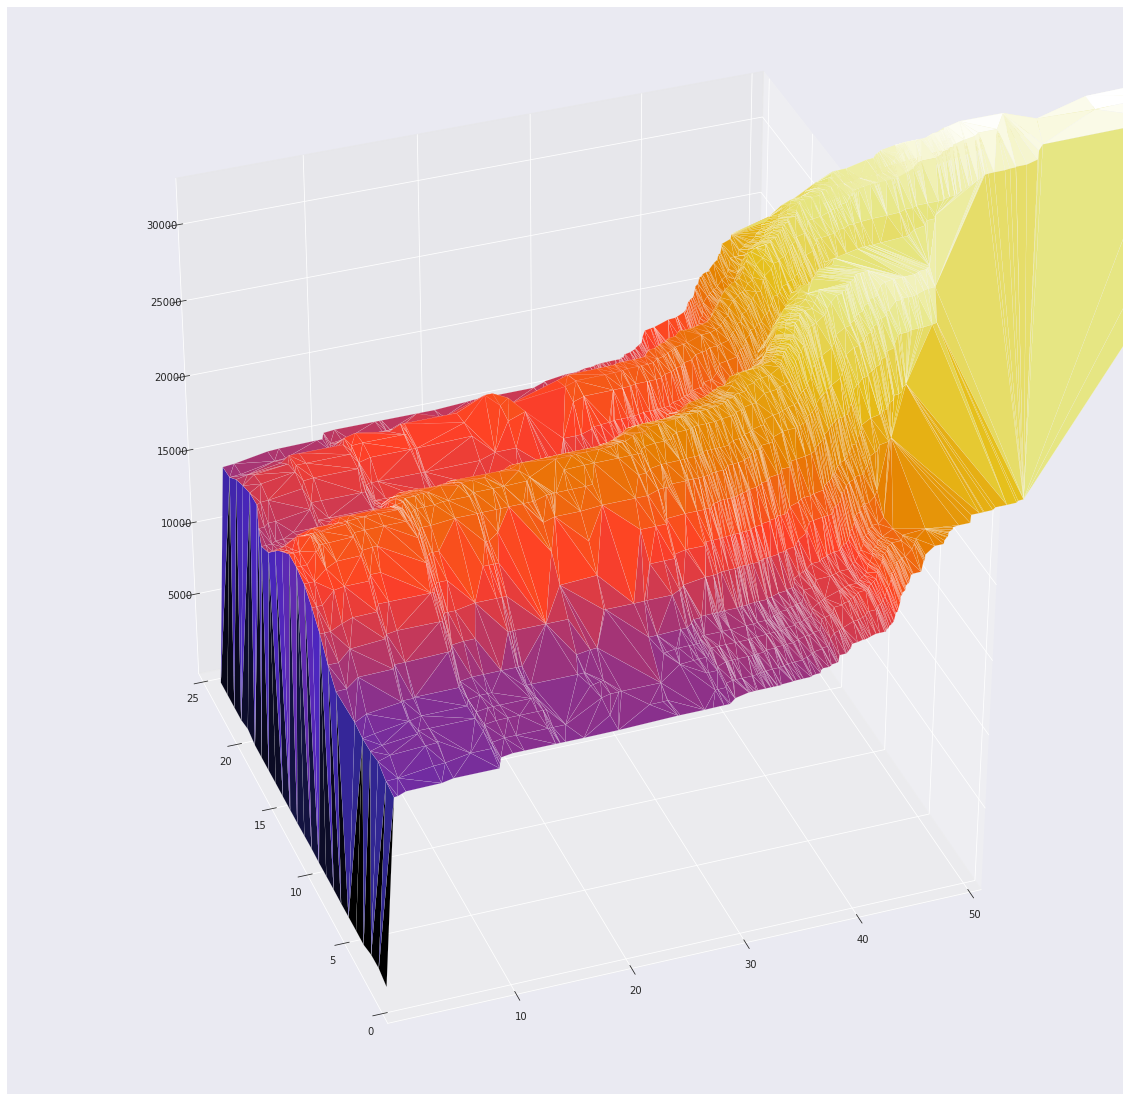

In [107]:
# Now we can use our lists to plot 3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,250)
plt.xlim(0.01,50)
X=pd.concat(x_list)
Y=pd.concat(y_list)
Z=pd.concat(z_list)

ax.plot_trisurf(X, Z, Y, linewidth=0.1, antialiased=True, cmap=plt.cm.CMRmap)

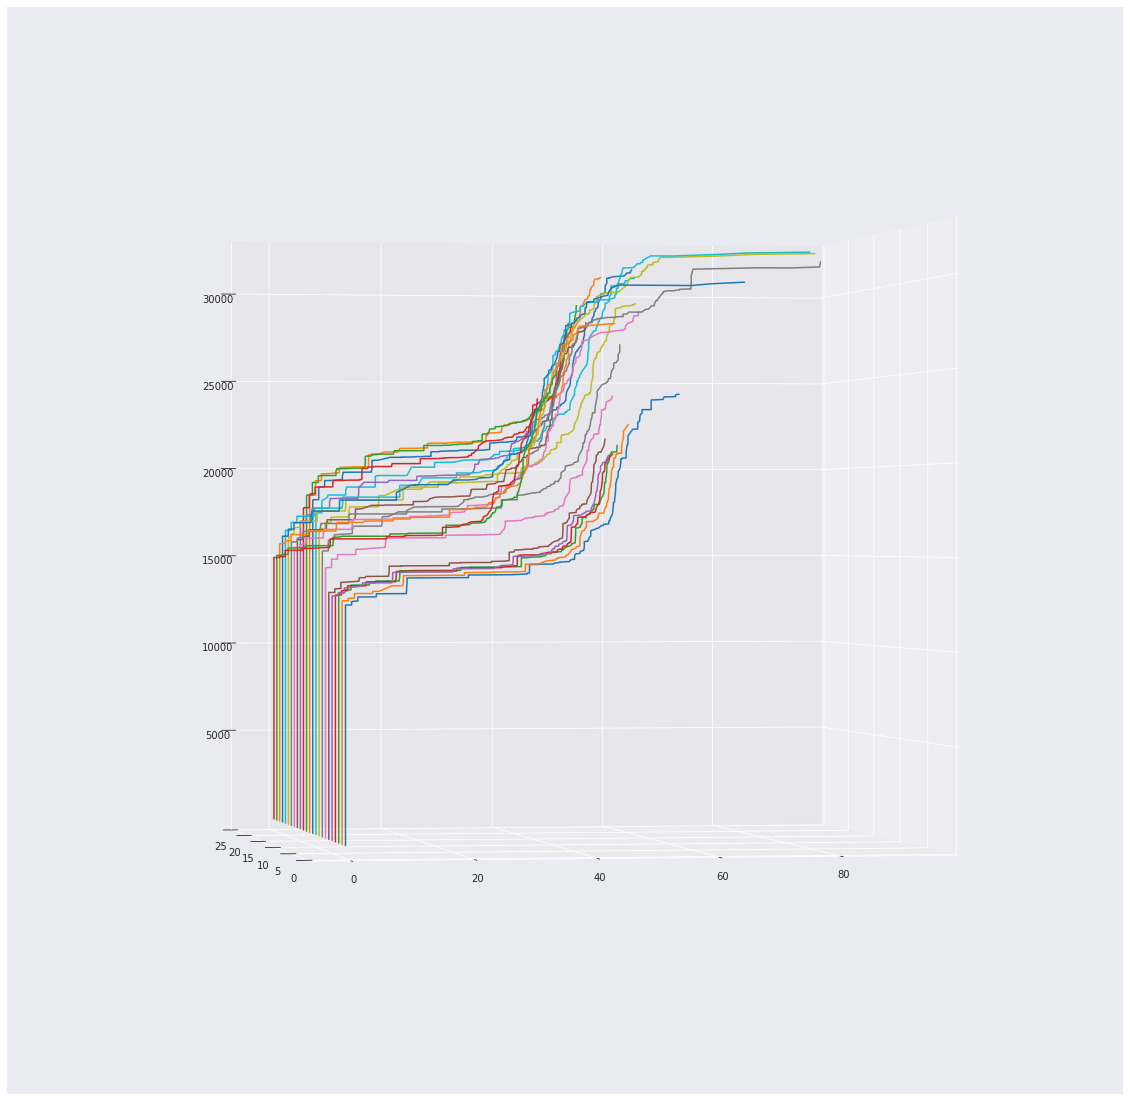

In [97]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0,260)

for i in range(len(x_list)):
    ax.plot(x_list[i], z_list[i], y_list[i])
plt.show()

In [25]:
dates = np.sort(data.BID_OFFER_DATE_DT.unique())
dates[1]

numpy.datetime64('2017-01-05T00:00:00.000000000')

In [25] used 0.1406 MiB RAM in 0.16s, peaked 0.00 MiB above current, total RAM usage 3390.98 MiB


10 giorni

/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


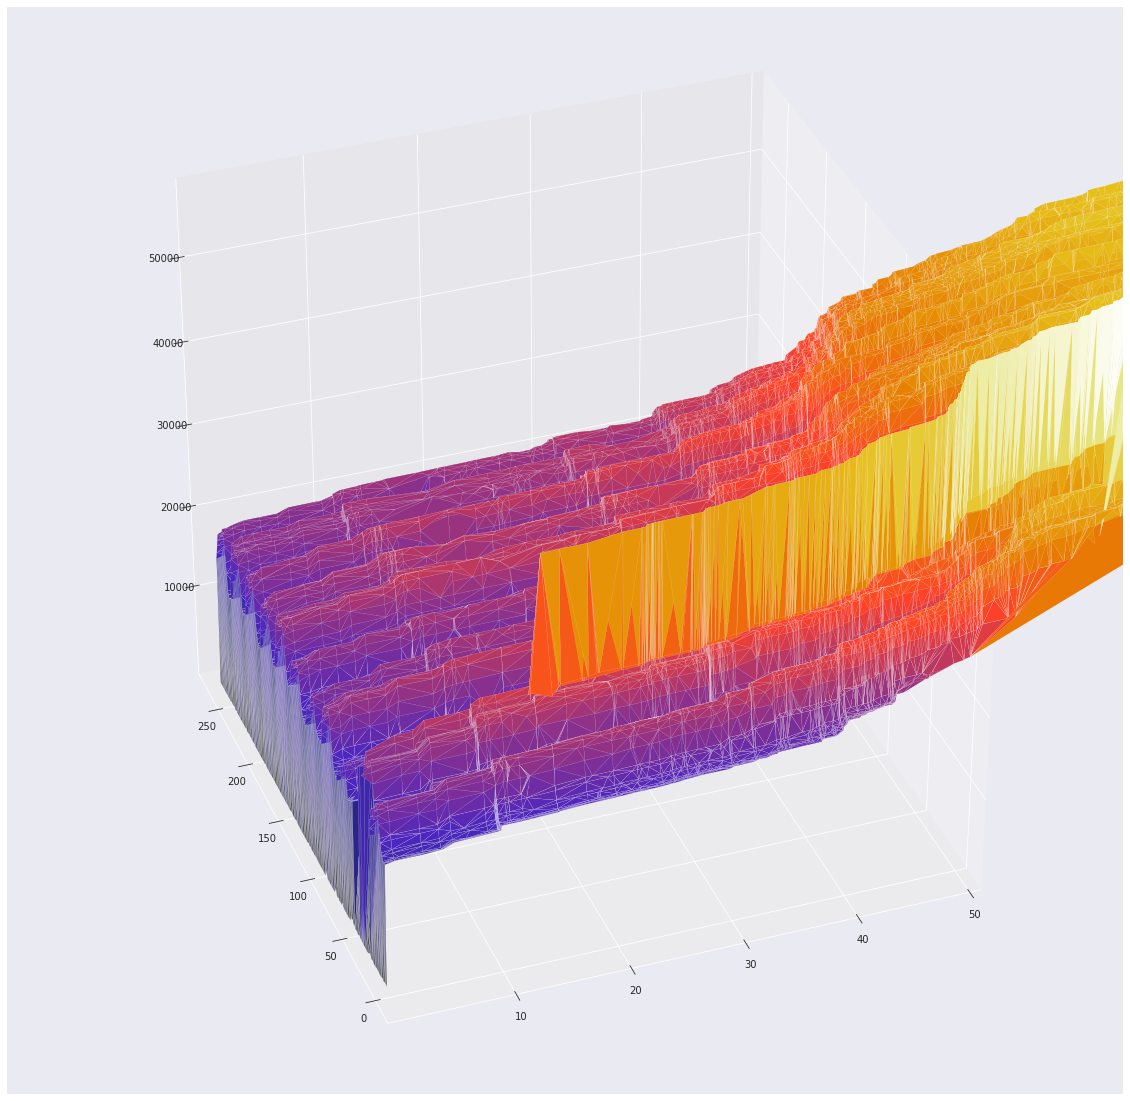

In [132]:
dx_list=[]
dy_list=[]
dz_list=[]

i=0
for date in dates:
    if date <= dates[10]:
        
        dday=data[(data["PURPOSE_CD"]=="OFF")&(data["BID_OFFER_DATE_DT"]==date)]

        for interval in dday["INTERVAL_NO"].unique():
            d=dday[dday["INTERVAL_NO"]==interval]
            d.sort_values(by="ENERGY_PRICE_NO", inplace=True)
            d["SCUM"]=np.cumsum(d["QUANTITY_NO"])
            x=d["ENERGY_PRICE_NO"]
            dx_list.append(x)
            y=d["SCUM"]
            dy_list.append(y)
            z=pd.Series([interval+24*i for elem in range(len(x)) ])
            dz_list.append(z)
        
        i+=1

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,250)
plt.xlim(0.01,50)
X=pd.concat(dx_list)
Y=pd.concat(dy_list)
Z=pd.concat(dz_list)

ax.plot_trisurf(X, Z, Y, linewidth=0.1, antialiased=True, cmap=plt.cm.CMRmap)

interval:  18


/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


interval:  19
interval:  20
interval:  21


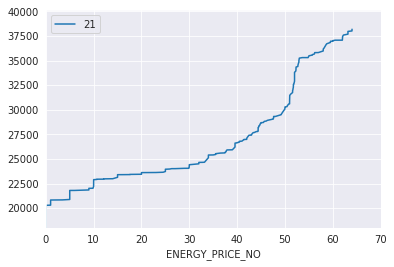

In [150]:
for interval in range(18,22):
    print("interval: ", interval)
    strange=data[(data["PURPOSE_CD"]=="OFF")&(data["BID_OFFER_DATE_DT"]==dates[1])&(data["INTERVAL_NO"]==interval)]
    strange.sort_values(by="ENERGY_PRICE_NO", inplace=True)
    strange["SCUM"]=np.cumsum(strange["QUANTITY_NO"])
    strange.plot(kind="line", x="ENERGY_PRICE_NO", y="SCUM", ylim=18000, label=interval).set_xlim(0,70)


giorno numpy.datetime64('2017-01-05T00:00:00.000000000') verso sera (Intervallo 19) c'è un picco strano

20 giorni.

/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


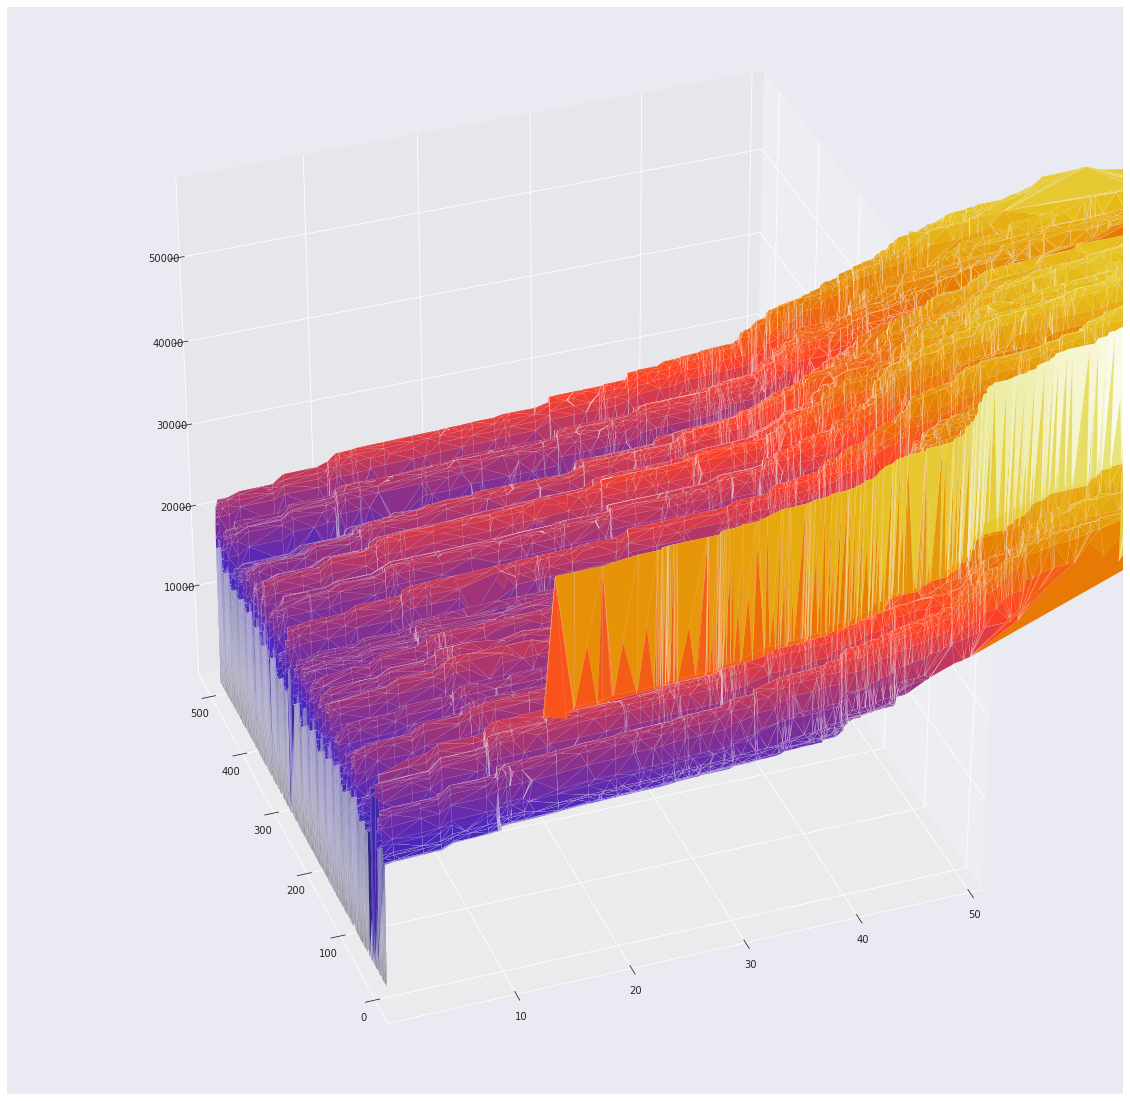

In [152]:
dx_list=[]
dy_list=[]
dz_list=[]

i=0
for date in dates:
    if date <= dates[20]:
        
        dday=data[(data["PURPOSE_CD"]=="OFF")&(data["BID_OFFER_DATE_DT"]==date)]

        for interval in dday["INTERVAL_NO"].unique():
            d=dday[dday["INTERVAL_NO"]==interval]
            d.sort_values(by="ENERGY_PRICE_NO", inplace=True)
            d["SCUM"]=np.cumsum(d["QUANTITY_NO"])
            x=d["ENERGY_PRICE_NO"]
            dx_list.append(x)
            y=d["SCUM"]
            dy_list.append(y)
            z=pd.Series([interval+24*i for elem in range(len(x)) ])
            dz_list.append(z)
        
        i+=1

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,250)
plt.xlim(0.01,50)
X=pd.concat(dx_list)
Y=pd.concat(dy_list)
Z=pd.concat(dz_list)

ax.plot_trisurf(X, Z, Y, linewidth=0.1, antialiased=True, cmap=plt.cm.CMRmap)

100 giorni

/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


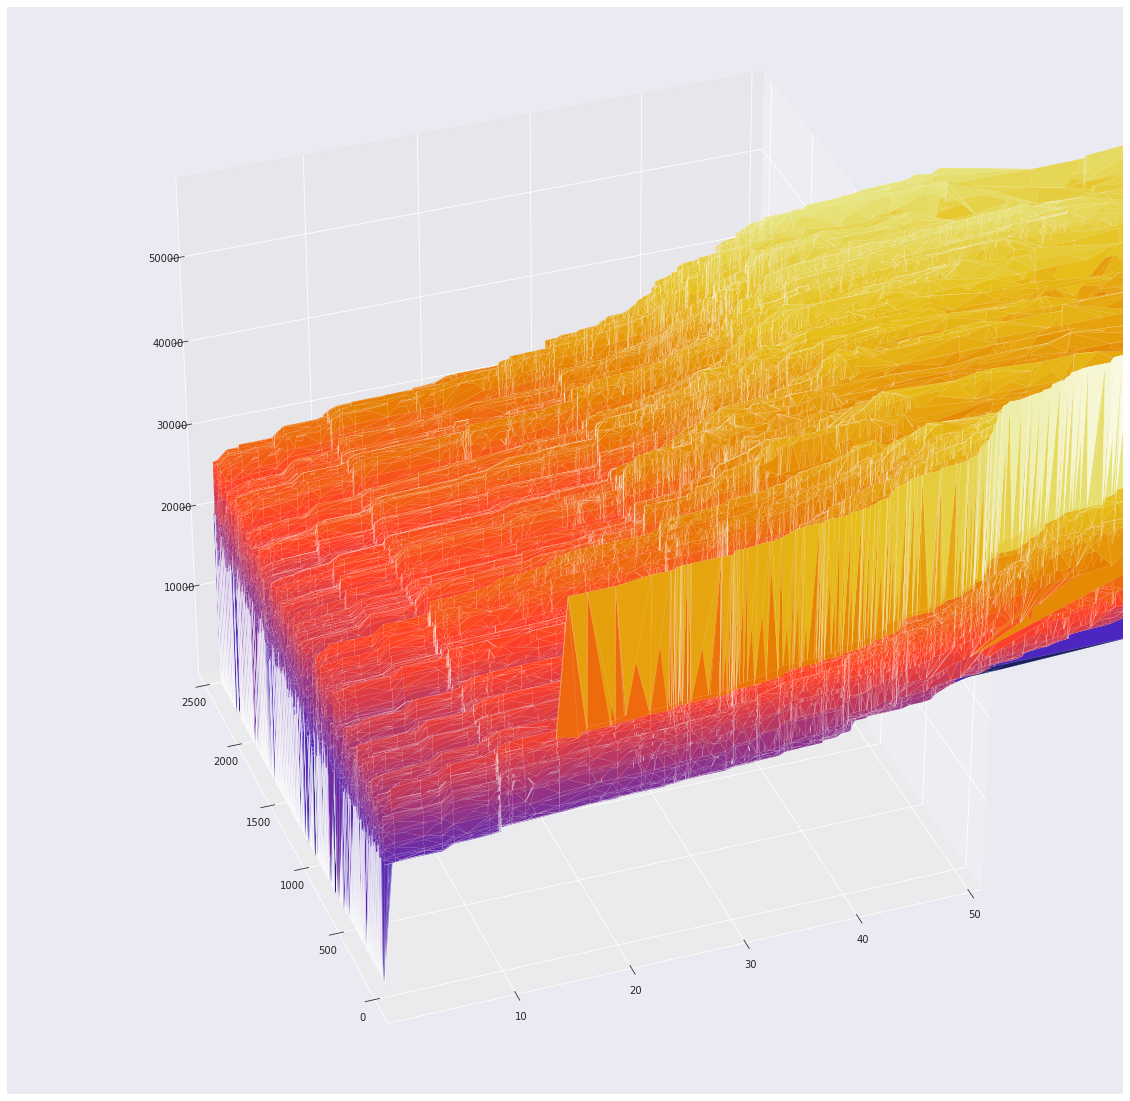

In [32] used 772.9531 MiB RAM in 574.11s, peaked 83.29 MiB above current, total RAM usage 4177.16 MiB


In [32]:
dx_list=[]
dy_list=[]
dz_list=[]
#z_list=dday["INTERVAL_NO"].unique()

i=0
for date in dates:
    if date <= dates[100]:
        
        dday=data[(data["PURPOSE_CD"]=="OFF")&(data["BID_OFFER_DATE_DT"]==date)]

        for interval in dday["INTERVAL_NO"].unique():
            d=dday[dday["INTERVAL_NO"]==interval]
            d.sort_values(by="ENERGY_PRICE_NO", inplace=True)
            d["SCUM"]=np.cumsum(d["QUANTITY_NO"])
            x=d["ENERGY_PRICE_NO"]
            dx_list.append(x)
            y=d["SCUM"]
            dy_list.append(y)
            z=pd.Series([interval+24*i for elem in range(len(x)) ])
            dz_list.append(z)
        
        i+=1

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,250)
plt.xlim(0.01,50)
X=pd.concat(dx_list)
Y=pd.concat(dy_list)
Z=pd.concat(dz_list)

ax.plot_trisurf(X, Z, Y, linewidth=0.1, antialiased=True, cmap=plt.cm.CMRmap)


<hr>

In [50]:
%whos 
# check for active variables in jupyter session

Variable    Type         Data/Info
----------------------------------
a           int          2
data        DataFrame             PURPOSE_CD  INTE<...>781334 rows x 11 columns]
datetime    module       <module 'datetime' from '<...>b/python3.6/datetime.py'>
intervals   ndarray      25: 25 elems, type `int64`, 200 bytes
legenda     dict         n=11
np          module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pd          module       <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
plt         module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns         module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
